# Seminar2024

このスクリプトは熊本プロジェクトの準備プログラミングの一環です。
2次元ガウス行列をフィルターとして使用する畳み込み操作が含まれています。


## 1.1 Gaussianカーネルを用いた2D画像処理
このコードは、2D画像を処理するためのガウスカーネルの構築とそれに基づく畳み込み演算を実装しています。以下に、各関数の詳細を説明します。


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
import cv2

def gaussian_kernel_1d(x, xi, sigma):
    return np.exp(-((x - xi) ** 2) / (2 * sigma ** 2))

def construct_G_matrix(xi_values, t_values, sigma):
    M = len(xi_values)
    N = len(t_values)
    G = np.zeros((M, N)) 
    for i, xi in enumerate(xi_values):
        for j, tj in enumerate(t_values):
            G[i, j] = gaussian_kernel_1d(xi, tj, sigma)  # g(xi - tj)
    return G


def convolve_dot_product(image_2d, filter_size, sigma):
    """
    The function is from 'Seminar2024_Image Processing_王 孟琪　p.14, eq(2)'.
    filter_size: (M, N)
    sigma: standard deviation of Guassian function
    M: same value with N
    """

    M = N = filter_size
    # Generate xi and t values
    xi_values = np.linspace(0, M, M)  # range of ξ_m
    t_values = np.linspace(0, N, N)  # range of t_n

    # Construct G, F, X matrix
    G = construct_G_matrix(xi_values, t_values, sigma)
    F = G.T
    Y1_2d = np.dot(np.dot(G, image_2d), F.T)
    Y1_1d = Y1_2d.flatten()
    return Y1_1d


def convolve_kronecker_product(image_2d, filter_size, sigma):
    """
    The function is from 'Seminar2024_Image Processing_王 孟琪　p.14, eq(2)'.
    filter_size: (M, N)
    sigma: standard deviation of Guassian function
    M: same value with N
    """

    M = N = filter_size

    # Generate xi and t values
    xi_values = np.linspace(0, M, M)  # range of ξ_m
    t_values = np.linspace(0, N, N)  # range of t_n

    # Construct G, F, X matrix
    G = construct_G_matrix(xi_values, t_values, sigma)
    F = G.T
    vec_X = image_2d.flatten()
    Y2_1d = np.dot(np.kron(F, G), vec_X)
    return Y2_1d

## 1.2 サンプル画像の準備
`skimage`から取得したサンプル画像とランダムな画像を準備し、標準化されたサイズにリサイズします。

In [ ]:
# Set image size
X_size = 100

# Set image category
name = [
    "brick",
    "camera",
    "checkerboard",
    "coins",
    "grass",
    "random"
]
X = {}
X_standardized = {}

# 標準化
for i in name:
    if i != "random":
        X[i] = getattr(data, i)()
        # Reshape images to ((X_size, X_size))
        X_standardized[i] = cv2.resize(X[i], (X_size, X_size))
        print(f"{i}:{X_standardized[i].shape}")
        
# Generize random image
X_random = np.random.random((X_size, X_size))
X_standardized["random"] = X_random 
print(f"random:{X_standardized['random'].shape}")

brick:(100, 100)
camera:(100, 100)
checkerboard:(100, 100)
coins:(100, 100)
grass:(100, 100)
random:(100, 100)


## 1.3  畳み込み処理の実行
準備した画像に対して畳み込み処理を実行し、1次元および2次元の結果を得ます。

In [ ]:
# Set filter parameters
filter_size = 100
sigma = 4

# Output 1D result
X_result_1D = {}
for i in name:
    X_result_1D[i] = convolve_kronecker_product(X_standardized[i], filter_size, sigma)
    print(f"{i}: {X_result_1D[i].shape}")

# Resize to 2D result
X_result_2D = {}
print(f"\nAfter Reshaped:")
for i in name:
    X_result_2D[i] = X_result_1D[i].reshape(X_size, X_size)
    print(f"{i}: {X_result_2D[i].shape}")


brick: (10000,)
camera: (10000,)
checkerboard: (10000,)
coins: (10000,)
grass: (10000,)
random: (10000,)

After Reshaped:
brick: (100, 100)
camera: (100, 100)
checkerboard: (100, 100)
coins: (100, 100)
grass: (100, 100)
random: (100, 100)


## 1.4 結果の可視化
畳み込み前後の画像を可視化します。

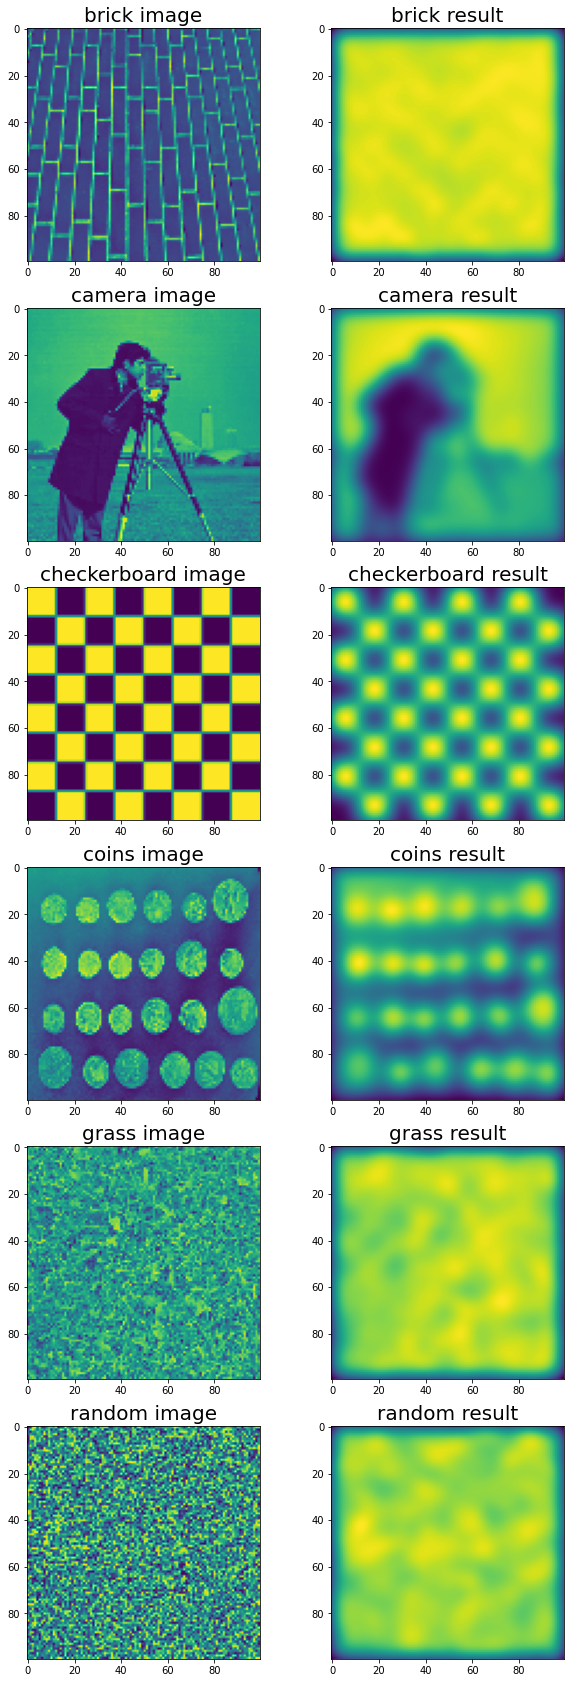

In [13]:
# Plot figures
fig_col = len(name)
fig, axs = plt.subplots(fig_col, 2, figsize=(10, 30))

for i, col in enumerate(name):
    row = i 
    axs[row, 0].imshow(X_standardized[col], cmap='viridis')
    axs[row, 0].set_title(f"{col} image", fontsize=20)
    axs[row, 1].imshow(X_result_2D[col], cmap='viridis')
    axs[row, 1].set_title(f"{col} result", fontsize=20)

# plt.colorbar(label="g(ξi - tj)")
# plt.title("result")
# plt.xlabel("tj")
# plt.ylabel("ξi")
# plt.show()

plt.show()